## AccelerateAI - Data Science Bootcamp 
### Question on Hypothesis Testing 

In [66]:
# Import required libraries
import numpy as np                  #data handling
import pandas as pd  

import math
import scipy.stats as st            #Statistics

import matplotlib.pyplot as plt     #Visualization
import seaborn as sns 

### Q1.  MEASURING STUDENT REACTION TO A NEW TEXTBOOK

A required chemistry course at State University has been using the same textbook for a number of years.<br>
Over the years, the students have been asked to rate this textbook on 10-point scale, and the average rating has been stable at about 5.2. 

This year, the faculty decided to experiment with a new textbook. After the course, 50 randomly selected students were asked to rate this new textbook, also on a scale of 1 to 10.(Data in file ***01_Textbook_Ratings.csv.*** ) 

**Can we conclude that the students like this new textbook any more or less than the previous textbook?**

In [67]:
# Lets read the file 
rating_df = pd.read_csv("01_Textbook_Ratings.csv")
rating_df.sample(5)

,Student,Rating
32,33,10
12,13,4
29,30,8
22,23,4
9,10,10


In [68]:
#Step 1: Check for data quality
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Student  50 non-null     int64
 1   Rating   50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [69]:
# Step 2 : Find the mean and variance 
print("N:", rating_df.shape[0])

mean = rating_df.Rating.mean()
sd = rating_df.Rating.std()
print("Mean rating:", mean, " Std. dev rating:", sd)

N: 50
Mean rating: 5.68  Std. dev rating: 1.9529151417868642


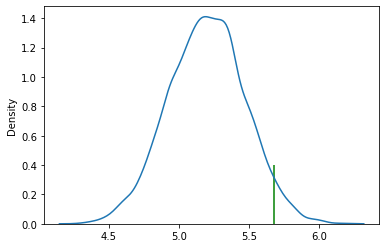

In [70]:
# Step 3: The mean follows a normal distribution with population mean = mean and SD = sd/sqrt(N)
mean_rating_rv = st.norm.rvs(loc=5.2, scale=sd/math.sqrt(50), size=5000)
sns.kdeplot(mean_rating_rv)
plt.vlines(x=mean, ymin=0, ymax=0.4,colors="g")

The first question is whether the test should be one-tailed or two-tailed. Of course, the faculty have chosen the new textbook with the expectation that it will be preferred by the students, but it is very possible that students will like it less than the previous textbook.

#### We will use a one-sample t test, with a two-tailed alternative, to see whether students like the new textbook any more or less than the old textbook.

Null Hypothesis: $\mu$ = 5.2   <br>
Alternate hypothesis: $\mu$ $\neq$ 5.2

In [71]:
p_val = st.ttest_1samp(a=rating_df.Rating, popmean=5.2, alternative='two-sided')

print(f'The p-values is {p_val.pvalue}')

The p-values is 0.08849715486743326


#### Since p-value is not less than 0.05, we do not have a strong evidence to reject the Null hypothesis. Hence we cannot we conclude that the students like this new textbook any more or less than the previous textbook.

### Q2. MEASURING EFFECTIVENESS OF SAFETY TRAINING AT A CHEMICAL PLANT

The managers of a chemical manufacturing plant want  to determine whether recent safety training workshops
have reduced the weekly number of reported safety violations at the facility. 

The management team has randomly selected weekly safety violation reports for each of 25 weeks prior to the safety training and
25 weeks after the safety workshops. These data are provided in the file ***02_Chemicalplant_Safety.xlsx***

**Given this evidence, is it possible to conclude that the safety workshops have been effective in reducing the number of safety violations reported per week? Report a p-value and interpret your findings for the management team.**

In [72]:
before = pd.read_excel("02_Chemicalplant_Safety.xlsx", sheet_name='Before')
before.head()

,Week,Violations
0,1,1
1,2,1
2,3,3
3,4,2
4,5,1


In [73]:
after = pd.read_excel("02_Chemicalplant_Safety.xlsx", sheet_name='After')
after.head()

,Week,Violations
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1


In [74]:
#Mean violation before and after
print(f'Mean Violation(before):{before.Violations.mean()} \nMean Violation(after) :{after.Violations.mean()}')

Mean Violation(before):1.72 
Mean Violation(after) :1.08


There is a before and after sample. So We will use a two-sample unpaired (independent) t-test, with a two-tailed alternative, to see whether mean violation has changed.<br>
Null Hypothesis:  $\mu$(before) =  $\mu$(after) <br>
Alternate hypothesis:   $\mu$(before) >   $\mu$(after)

In [75]:
p_val= st.ttest_ind(before.Violations, after.Violations,  alternative='greater')

print(f'The p-values is {p_val.pvalue}')

The p-values is 0.005372472303888742


#### Since p-value is  less than 0.05, we reject the Null hypothesis. Hence the violations have reduced after the program.

### Q3. MEASURING THE EFFECTS OF NEW STYLES OF SOFT-DRINK CANS

Beer and soft-drink companies have become very concerned about the style of their cans.

There are cans with fluted and embossed sides and cans with six-color graphics and holograms. Coca-Cola has even introduced a contoured can, shaped like the old-fashioned Coke bottle minus the neck. 

Evidently, these companies believe the style of the can makes a difference to consumers, which presumably translates into higher sales.

Assume that a soft-drink company is considering a style change to its current can, which has been the company’s trademark for many years. To determine whether this new style is popular with consumers, the company runs a number of focus group sessions around the country. At each of these sessions, randomly selected consumers are allowed to examine the new and traditional styles, exchange ideas, and offer their opinions. 

Eventually, they fill out a form where, among other questions, they are asked to respond to the following items, each on a scale of 1 to 7, 7 being the best:
- Rate the attractiveness of the traditional-style can (AO).
- Rate the attractiveness of the new-style can (AN).
- Rate the likelihood that you would buy the product with the traditional-style can (WBO).
- Rate the likelihood that you would buy the product with the new-style can (WBN).
(A and WB stand for “attractiveness” and “would buy,” and O and N stand for “old” and “new.”) 

**What can the company conclude from these data?**

In [76]:
# Read the data file
sdratings = pd.read_csv("03_Softdrink_Cans_Rating.csv") 
sdratings.head()

,Consumer,AO,AN,WBO,WBN
0,1,5,7,4,1
1,2,7,7,6,6
2,3,6,7,7,6
3,4,1,3,1,1
4,5,3,4,1,1


In [77]:
# Let us look at the summary statistics

sdratings.describe()

,Consumer,AO,AN,WBO,WBN
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,4.411111,4.950000,3.861111,4.338889
std,52.105662,1.710268,1.975478,1.922417,2.066395
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45.750000,3.000000,3.750000,2.000000,3.000000
50%,90.500000,5.000000,5.000000,4.000000,4.000000
75%,135.250000,6.000000,7.000000,5.000000,6.000000
max,180.000000,7.000000,7.000000,7.000000,7.000000


#### There are several difference of interest. The most important one we care about is the difference between likelihood of buying based on difference in can style.

diff = WBO - WBN 

Since the same person responds to all the question - this is case where we will use a paired t-test (left-tailed). 

We formulate the hypothesis as follows:
- Null Hypothesis:  $\mu$(WBN) $\leq$  $\mu$(WBO) <br>
- Alternate hypothesis:   $\mu$(WBN) $\gt$  $\mu$(WBO)

In [78]:
# Calculate the t-test on TWO RELATED samples of scores, a and b.
# alternative=‘greater’: mean of the first sample is greater than the mean of the second sample.

p_val= st.ttest_rel(sdratings.WBN, sdratings.WBO, alternative='greater')  
print(f'The p-values is {p_val.pvalue}')

The p-values is 2.0084599545902635e-06


#### Conclusion: Consumer are more likely to purchase the can with new style.

### Q4. RELATIONSHIP BETWEEN DEMANDS FOR DESKTOPS AND LAPTOPS AT BIG OFFICE

Big Office, a chain of large office supply stores, sells an extensive line of desktop and laptop computers. 
Company executives want to know whether the demands for these two types of computers are related in any way. 
- They might act as complementary products,where high demand for desktops accompanies high demand for laptops
- They might act as substitute products (demand for one takes away demand for the other)
- Their demands might be unrelated. 

Because of limitations in its information system, Big Office does not have the exact demands for these products. 
However, it does have daily information on categories of demand, listed in aggregate (that is, over all stores). 

These data appear in Figure 9.32. (See the file PC Demand.xlsx.) Each day’s demand for each type of computer is categorized as Low, MedLow (medium-low),
MedHigh (medium-high), or High. The data is based on 250 days. 

***Based on these data, can Big Office conclude that demands for these two products are independent?***

In [79]:
# Read the data
demand_df = pd.read_excel("04_Laptop_Demand.xlsx", sheet_name='Data', index_col="Rownames")

In [80]:
demand_df

,Win_Low,Win_MediumLow,Win_MediumHigh,Win_High
Rownames,,,,
Mac_Low,4,17,17,5
Mac_MediumLow,8,23,22,27
Mac_MediumHigh,16,20,14,20
Mac_High,10,17,19,11


#### We will use a Chi-Squared Test of independence. 
- Null hypothesis:  Win and Mac sales are independent
- Alternate hypothesis: Win and Mac sales are not independent. 

In [81]:
st.chi2_contingency(demand_df)              # return values - Chi-Sq, P-val, dof , expected frequency

(17.242027507828368,
 0.04505802666265925,
 9,
 array([[ 6.536, 13.244, 12.384, 10.836],
        [12.16 , 24.64 , 23.04 , 20.16 ],
        [10.64 , 21.56 , 20.16 , 17.64 ],
        [ 8.664, 17.556, 16.416, 14.364]]))

#### We conclude that the demand for Mac and Windows is not independent, at 5% level of confidence.